In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import splitfolders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = "yoga_pose"
path = "/content/drive/MyDrive/"+dataset
train_path = path + '/Train'
test_path = path + '/Test'
output = path + '/output'


In [ ]:
#Run only once to create the output folder
#splitfolders.ratio(train_path, output=output, seed=42, ratio=(.8, 0.2) )

shape of the image is: (268, 527, 4)


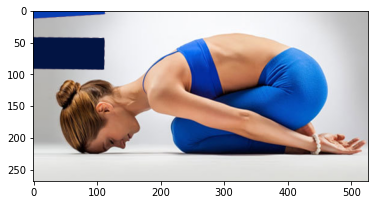

In [ ]:
# Visualise the original data
yoga_image = train_path + '/Balasana/' +  'File7.png'
print("shape of the image is:",imread(yoga_image).shape)
plt.imshow(imread(yoga_image))


In [ ]:
train_data = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True,rescale = 1./255)
val_data = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True,rescale = 1./255)
test_data = ImageDataGenerator(rescale =1./255,validation_split = 0.2)

In [ ]:
splitted_dir =output
train_path = splitted_dir + '/train'
val_path = splitted_dir + '/val'

In [ ]:
batch_size = 16

In [ ]:
train_tot = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

Found 1172 images belonging to 29 classes.
Found 58 images belonging to 29 classes.
Found 137 images belonging to 29 classes.


In [ ]:
train_tot_448 = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (448,448),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot_448 = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (448,448),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot_448 = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (448,448),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

Found 1172 images belonging to 29 classes.
Found 58 images belonging to 29 classes.
Found 137 images belonging to 29 classes.


## VGG19

In [ ]:
#model_vgg19_0 : Replace classifier (1 Classifier)
#model_vgg19_1 : Replace classifier and train last 5 layers (1 Classifier)
#model_vgg19_2 : Add 5 layers and train last 5 layers (2 Dense , 2 Droput, 1 Classifier)
#model_vgg19_3 : Change Input size to 448*448 and Add 5 layers and train last 5 layers (2 Dense , 2 Droput, 1 Classifier)

In [ ]:
batch = 16
early_stopping = EarlyStopping(min_delta=0.005, patience=8, restore_best_weights=True)

In [ ]:
x_1 = keras.applications.vgg19.VGG19(include_top=True, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-2].output
predictions = Dense(29, activation='softmax')(x)
model_vgg19_0 = tf.keras.Model(inputs=x_1.input, outputs=predictions)
for layer in model_vgg19_0.layers:
  layer.trainable = False
model_vgg19_0.layers[-1].trainable = True
#print(model_vgg19_0.summary())
model_vgg19_0.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

574710816/574710816 [==============================] - 25s 0us/step


In [ ]:
history_0 = model_vgg19_0.fit(train_tot, validation_data = validation_tot, epochs = 50,callbacks = [early_stopping])

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


74/74 [==============================] - 28s 330ms/step - loss: 3.6790 - accuracy: 0.0734 - val_loss: 3.1819 - val_accuracy: 0.1379
Epoch 2/30
74/74 [==============================] - 22s 292ms/step - loss: 2.8178 - accuracy: 0.2193 - val_loss: 2.3915 - val_accuracy: 0.2759
Epoch 3/30
74/74 [==============================] - 21s 289ms/step - loss: 2.4650 - accuracy: 0.3174 - val_loss: 2.4262 - val_accuracy: 0.4310
Epoch 4/30
74/74 [==============================] - 22s 298ms/step - loss: 2.1567 - accuracy: 0.4053 - val_loss: 2.1574 - val_accuracy: 0.4483
Epoch 5/30
74/74 [==============================] - 21s 290ms/step - loss: 1.8985 - accuracy: 0.4829 - val_loss: 1.8487 - val_accuracy: 0.5345
Epoch 6/30
74/74 [==============================] - 22s 301ms/step - loss: 1.7398 - accuracy: 0.5154 - val_loss: 1.7179 - val_accuracy: 0.5000
Epoch 7/30
74/74 [==============================] - 21s 287ms/step - loss: 1.6527 - accuracy: 0.5418 - val_loss: 1.7071 - val_accuracy: 0.4828
Epoch 8/30

In [ ]:
results_0 = model_vgg19_0.evaluate(test_tot, batch_size=10)
print("Results_0 test loss, test acc:", results_0)

9/9 [==============================] - 2s 274ms/step - loss: 1.3030 - accuracy: 0.6423
Results_0 test loss, test acc: [1.3030349016189575, 0.6423357725143433]


In [ ]:
x_1 = keras.applications.vgg19.VGG19(include_top=True, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-1].output
predictions = Dense(29, activation='softmax')(x)
model_vgg19_1 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_vgg19_1.layers:
  layer.trainable = False
model_vgg19_1.layers[-1].trainable = True
model_vgg19_1.layers[-2].trainable = True
model_vgg19_1.layers[-3].trainable = True
model_vgg19_1.layers[-4].trainable = True
model_vgg19_1.layers[-5].trainable = True

#print(model_vgg19_1.summary())
model_vgg19_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_1 = model_vgg19_1.fit(train_tot, validation_data = validation_tot, epochs = 50,callbacks = [early_stopping])

Epoch 1/30
74/74 [==============================] - 24s 321ms/step - loss: 3.3696 - accuracy: 0.0324 - val_loss: 3.3685 - val_accuracy: 0.0345
Epoch 2/30
74/74 [==============================] - 21s 289ms/step - loss: 3.3682 - accuracy: 0.0461 - val_loss: 3.3683 - val_accuracy: 0.0345
Epoch 3/30
74/74 [==============================] - 21s 289ms/step - loss: 3.3679 - accuracy: 0.0461 - val_loss: 3.3682 - val_accuracy: 0.0345
Epoch 4/30
74/74 [==============================] - 22s 293ms/step - loss: 3.3676 - accuracy: 0.0461 - val_loss: 3.3682 - val_accuracy: 0.0345
Epoch 5/30
74/74 [==============================] - 22s 298ms/step - loss: 3.3674 - accuracy: 0.0461 - val_loss: 3.3681 - val_accuracy: 0.0345
Epoch 6/30
74/74 [==============================] - 23s 303ms/step - loss: 3.3671 - accuracy: 0.0461 - val_loss: 3.3682 - val_accuracy: 0.0345


In [ ]:
results_1 = model_vgg19_1.evaluate(test_tot, batch_size=10)
print("Results_1 test loss, test acc:", results_1)

9/9 [==============================] - 1s 128ms/step - loss: 3.3643 - accuracy: 0.0146
Results_1 test loss, test acc: [3.3642594814300537, 0.014598540030419827]


In [ ]:
x_1 = keras.applications.vgg19.VGG19(include_top=False, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-1].output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)
model_vgg19_2 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_vgg19_2.layers:
  layer.trainable = False
model_vgg19_2.layers[-1].trainable = True
model_vgg19_2.layers[-2].trainable = True
model_vgg19_2.layers[-3].trainable = True
model_vgg19_2.layers[-4].trainable = True
model_vgg19_2.layers[-5].trainable = True
#print(model_vgg19_2.summary())
model_vgg19_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
history_2 = model_vgg19_2.fit(train_tot, validation_data = validation_tot, epochs = 50,callbacks = [early_stopping])

Epoch 1/30
74/74 [==============================] - 23s 294ms/step - loss: 4.8811 - accuracy: 0.0828 - val_loss: 2.8811 - val_accuracy: 0.3276
Epoch 2/30
74/74 [==============================] - 21s 288ms/step - loss: 2.8659 - accuracy: 0.1758 - val_loss: 2.3551 - val_accuracy: 0.4138
Epoch 3/30
74/74 [==============================] - 21s 289ms/step - loss: 2.7482 - accuracy: 0.1852 - val_loss: 2.1107 - val_accuracy: 0.4138
Epoch 4/30
74/74 [==============================] - 21s 288ms/step - loss: 2.5720 - accuracy: 0.2082 - val_loss: 1.6407 - val_accuracy: 0.5345
Epoch 5/30
74/74 [==============================] - 22s 298ms/step - loss: 2.5145 - accuracy: 0.2304 - val_loss: 1.9895 - val_accuracy: 0.4655
Epoch 6/30
74/74 [==============================] - 21s 285ms/step - loss: 2.5339 - accuracy: 0.2218 - val_loss: 1.6043 - val_accuracy: 0.4138
Epoch 7/30
74/74 [==============================] - 21s 284ms/step - loss: 2.4906 - accuracy: 0.2363 - val_loss: 1.9525 - val_accuracy: 0.4655

In [ ]:
results_2 = model_vgg19_2.evaluate(test_tot, batch_size=10)
print("Results_2 test loss, test acc:", results_2)

9/9 [==============================] - 1s 120ms/step - loss: 1.3731 - accuracy: 0.6496
Results_2 test loss, test acc: [1.373128890991211, 0.6496350169181824]


In [ ]:
x_1 = keras.applications.vgg19.VGG19(include_top=False, weights="imagenet",input_shape= (448,448,3))
x = x_1.layers[-1].output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation='softmax')(x)
model_vgg19_3 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_vgg19_3.layers:
  layer.trainable = False
model_vgg19_3.layers[-1].trainable = True
model_vgg19_3.layers[-2].trainable = True
model_vgg19_3.layers[-3].trainable = True
model_vgg19_3.layers[-4].trainable = True
model_vgg19_3.layers[-5].trainable = True
#print(model_vgg19_3.summary())
model_vgg19_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_3 = model_vgg19_3.fit(train_tot_448, validation_data = validation_tot_448, epochs = 50,callbacks = [early_stopping])

Epoch 1/50
13/74 [====>.........................] - ETA: 49s - loss: 34.5062 - accuracy: 0.0357

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


74/74 [==============================] - 75s 933ms/step - loss: 11.3741 - accuracy: 0.0435 - val_loss: 3.3656 - val_accuracy: 0.0345
Epoch 2/50
74/74 [==============================] - 58s 785ms/step - loss: 3.3973 - accuracy: 0.0341 - val_loss: 3.3651 - val_accuracy: 0.0690
Epoch 3/50
74/74 [==============================] - 60s 803ms/step - loss: 3.3932 - accuracy: 0.0435 - val_loss: 3.3560 - val_accuracy: 0.0345
Epoch 4/50
74/74 [==============================] - 59s 796ms/step - loss: 3.4073 - accuracy: 0.0452 - val_loss: 3.4434 - val_accuracy: 0.0345
Epoch 5/50
74/74 [==============================] - 58s 782ms/step - loss: 3.4029 - accuracy: 0.0461 - val_loss: 3.3631 - val_accuracy: 0.0172
Epoch 6/50
74/74 [==============================] - 58s 787ms/step - loss: 3.3780 - accuracy: 0.0452 - val_loss: 3.3677 - val_accuracy: 0.0345
Epoch 7/50
74/74 [==============================] - 58s 782ms/step - loss: 3.3739 - accuracy: 0.0478 - val_loss: 3.3678 - val_accuracy: 0.0345
Epoch 8/5

In [ ]:
results_3 = model_vgg19_3.evaluate(test_tot_448, batch_size=10)
print("Results_3 test loss, test acc:", results_3)

9/9 [==============================] - 6s 700ms/step - loss: 3.3691 - accuracy: 0.0219
Results_3 test loss, test acc: [3.3690812587738037, 0.021897809579968452]


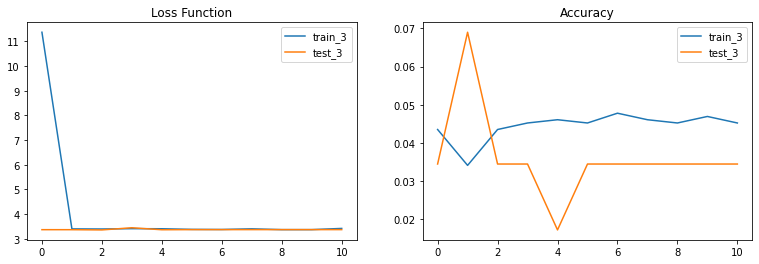

In [ ]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_3.history['loss'], label='train_3')
plt.plot(history_3.history['val_loss'], label='test_3')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_3.history['accuracy'], label='train_3')
plt.plot(history_3.history['val_accuracy'], label='test_3')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_0.history['loss'], label='train_0')
plt.plot(history_1.history['loss'], label='train_1')
plt.plot(history_2.history['loss'], label='train_2')
plt.plot(history_3.history['loss'], label='train_3')
plt.plot(history_0.history['val_loss'], label='test_0')
plt.plot(history_1.history['val_loss'], label='test_1')
plt.plot(history_2.history['val_loss'], label='test_2')
plt.plot(history_3.history['val_loss'], label='test_3')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_0.history['accuracy'], label='train_0')
plt.plot(history_1.history['accuracy'], label='train_1')
plt.plot(history_2.history['accuracy'], label='train_2')
plt.plot(history_3.history['accuracy'], label='train_3')
plt.plot(history_0.history['val_accuracy'], label='test_0')
plt.plot(history_1.history['val_accuracy'], label='test_1')
plt.plot(history_2.history['val_accuracy'], label='test_2')
plt.plot(history_3.history['val_accuracy'], label='test_3')
plt.title('Accuracy')
plt.legend()
plt.show()
